# ARIMA Model ACF PACF Functions

    In ARIMA Model you can forecast a time series using past values.
    
## Introduction To Time Series Forecasting

    A Time Series is a sequence where a metric is recorded over a specific time interval.
    Depending on the frenquency a time series can be Yearly(Annual Budget), Quartly(Quartly Company Results), Monthly(Air Traffic), Weekly(Sales), Daily(Weather), Hourly(Stock Price), Minutes(Inbound Calls in CallCenter) and Seconds(Website Traffic)
    
### Type Of Forecasting :
    
    1) Univariate Time Series Forecasting
    2) Multivariate Time Series Forecasting
  
#### ARIMA Model

    Auto Regressive Integerated Moving Average, It is a class of model that explains a given time series based on the past values.
    
    ARIMA Model is characterized by 3 terms:
    
    1) p is the order of AR(Auto Regressive) term
    2) q is the order of MA(Moving Average) term
    3) d is the difference
    
    If Time Series has seasonal pattern then you need to use the folllowing model:- SARIMA (where S is for seasonality)

    12:30 => 300
    12:31 => 302
    12:32 => 301
    12:34 => 304
    12:35 => 306
    
    This is non-stationary data.

In [46]:
import numpy as np
import pandas as pd
from numpy import log
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv',
                 names=['value'], header=0)
df

,value
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


In [5]:
df_new = df['value'].dropna()
result = adfuller(df_new)

In [6]:
result

(-2.4642397172033697,
 0.12441935447109442,
 3,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 444.67104090432554)

In [7]:
result[1]  # p value

0.12441935447109442

# ------------------

## Project In Time Series

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('shampoo.csv')

In [10]:
data

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4
5,6-Jan,168.5,5
6,7-Jan,231.8,3
7,8-Jan,224.5,4
8,9-Jan,192.8,4
9,10-Jan,122.9,4


In [11]:
data = data.drop('Inflation', axis=1)

In [12]:
data

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3
5,6-Jan,168.5
6,7-Jan,231.8
7,8-Jan,224.5
8,9-Jan,192.8
9,10-Jan,122.9


In [13]:
data1 = pd.read_csv('shampoo.csv', index_col=[0], parse_dates=True, squeeze=True)
data1

,Sales,Inflation
Month,,
1-Jan,266.0,1
2-Jan,145.9,3
3-Jan,183.1,5
4-Jan,119.3,5
5-Jan,180.3,4
6-Jan,168.5,5
7-Jan,231.8,3
8-Jan,224.5,4
9-Jan,192.8,4


In [14]:
data1.index

Index(['1-Jan', '2-Jan', '3-Jan', '4-Jan', '5-Jan', '6-Jan', '7-Jan', '8-Jan',
       '9-Jan', '10-Jan', '11-Jan', '12-Jan', '1-Feb', '2-Feb', '3-Feb',
       '4-Feb', '5-Feb', '6-Feb', '7-Feb', '8-Feb', '9-Feb', '10-Feb',
       '11-Feb', '12-Feb', '1-Mar', '2-Mar', '3-Mar', '4-Mar', '5-Mar',
       '6-Mar', '7-Mar', '8-Mar', '9-Mar', '10-Mar', '11-Mar', '12-Mar'],
      dtype='object', name='Month')

In [15]:
data1 = data1.drop('Inflation', axis=1)
data1

,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3
6-Jan,168.5
7-Jan,231.8
8-Jan,224.5
9-Jan,192.8


<AxesSubplot:>

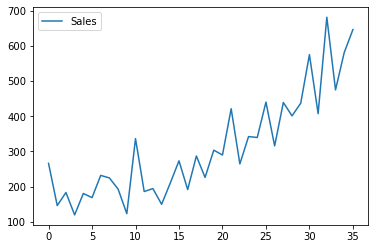

In [16]:
data.plot()

<AxesSubplot:xlabel='Month'>

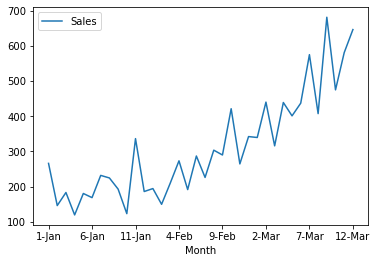

In [17]:
data1.plot()

<AxesSubplot:xlabel='Month'>

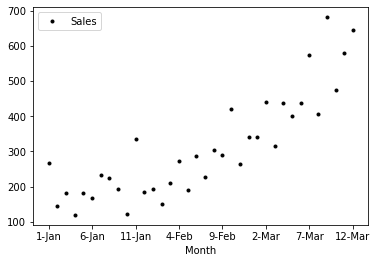

In [18]:
data1.plot(style='k.')

In [19]:
data1.size

36

In [20]:
data1.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Calculating the moving average

In [21]:
data_ma = data.rolling(window=10).mean()

In [22]:
data_ma

,Sales
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,183.51


In [23]:
data1.rolling(window=10).mean()

,Sales
Month,
1-Jan,NaN
2-Jan,NaN
3-Jan,NaN
4-Jan,NaN
5-Jan,NaN
6-Jan,NaN
7-Jan,NaN
8-Jan,NaN
9-Jan,NaN


<AxesSubplot:xlabel='Month'>

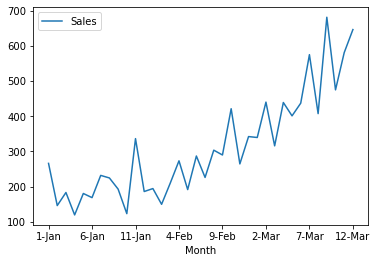

In [26]:
data1.plot()

<AxesSubplot:>

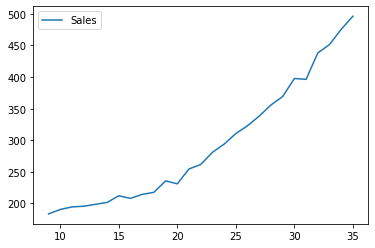

In [27]:
data_ma.plot()  # plotting moving average

### Calculating base line model

In [28]:
data1_base = pd.concat([data1, data1.shift(1)], axis=1)

In [29]:
data1_base

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [30]:
data1_base.columns

Index(['Sales', 'Sales'], dtype='object')

In [31]:
data1_base.columns = ['Actual_Sale', 'Forecast_sale']

In [33]:
data1_base.dropna(inplace=True)

In [34]:
data1_base

,Actual_Sale,Forecast_sale
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5
10-Jan,122.9,192.8


### Calculate the error

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
data1_error = mean_squared_error(data1_base.Actual_Sale,
                                data1_base.Forecast_sale)

In [37]:
data1_error

11715.388285714285

In [38]:
np.sqrt(data1_error)

108.23764726616282

### Calculating p, q, d

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

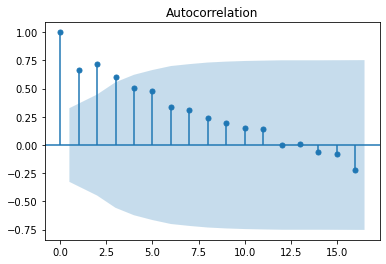

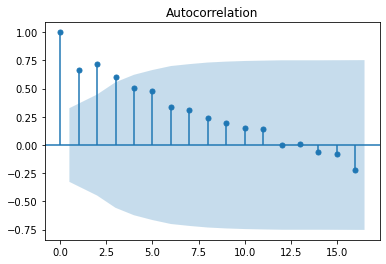

In [40]:
plot_acf(data1)

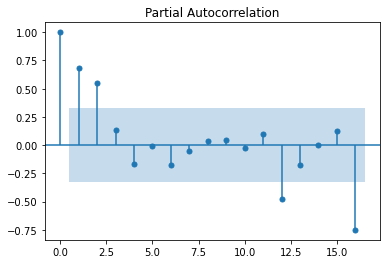

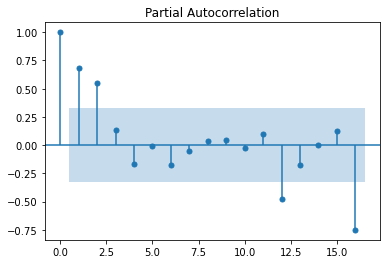

In [42]:
plot_pacf(data1)

In [43]:
p = 2
q = 3
d = 1  # d => 0-2

### Creating Arima Model

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
data_train = data1[:25]  # traning data
data_test = data1[25:]   # testing data

In [47]:
data1_model = ARIMA(data_train, order = (q,d,p))

In [48]:
data1_model_fit = data1_model.fit()

In [49]:
data1_forecast1 = data1_model_fit.forecast(steps=11)

In [50]:
data1_forecast1

(array([411.99805448, 364.11848588, 359.39475278, 351.27894101,
        406.97149415, 418.33291228, 411.19332377, 385.83429884,
        405.32984296, 435.87743838, 454.1712769 ]),
 array([45.77672928, 47.03996853, 53.77749672, 55.32956505, 66.91442654,
        68.00851035, 69.71351585, 70.4174994 , 75.62882188, 79.25592719,
        81.65608401]),
 array([[322.27731375, 501.7187952 ],
        [271.92184174, 456.31513003],
        [253.99279604, 464.79670953],
        [242.83498622, 459.72289579],
        [275.82162807, 538.12136022],
        [285.03868135, 551.62714322],
        [274.55734347, 547.82930407],
        [247.81853613, 523.85006154],
        [257.10007589, 553.55961003],
        [280.53867553, 591.21620123],
        [294.12829313, 614.21426067]]))

In [52]:
data1_model_fit.aic

272.3891948071225

In [53]:
data1_forecast = data1_model_fit.forecast(steps=11)[0]

In [54]:
data1_forecast

array([411.99805448, 364.11848588, 359.39475278, 351.27894101,
       406.97149415, 418.33291228, 411.19332377, 385.83429884,
       405.32984296, 435.87743838, 454.1712769 ])

In [55]:
np.sqrt(mean_squared_error(data_test, data1_forecast))

130.92710488561588

### Different q, d, p values

In [56]:
train, test = data1[:25], data1[25:]
for p in range(0,5):
    for d in range(0,3):
        for q in range(0,5):
            order = (q,d,p)
            prediction = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    prediction.append(pred_y)
                    mse = mean_squared_error(test, prediction)
                    error = np.sqrt(mse)
                    print("Order:",order,"Error:",error)
                except:
                    continue

Order: (0, 0, 0) Error: 279.1955489720747
Order: (1, 0, 0) Error: 247.30313330538604
Order: (2, 0, 0) Error: 212.71741096205747
Order: (3, 0, 0) Error: 215.23569247918724
Order: (4, 0, 0) Error: 182.30091831880634
Order: (0, 1, 0) Error: 183.98333056679897
Order: (1, 1, 0) Error: 178.00864113011298
Order: (2, 1, 0) Error: 188.38344174877938
Order: (3, 1, 0) Error: 148.40771184073944
Order: (4, 1, 0) Error: 149.46361761036343
Order: (0, 2, 0) Error: 184.43705299722754
Order: (1, 2, 0) Error: 137.28014095792403
Order: (2, 2, 0) Error: 184.45678203139144
Order: (3, 2, 0) Error: 157.1472448566518
Order: (4, 2, 0) Error: 141.60602277999126
Order: (0, 0, 1) Error: 264.8001265087148
Order: (1, 0, 1) Error: 215.70580107936493
Order: (2, 0, 1) Error: 177.9882029176423
Order: (4, 0, 1) Error: 168.34928126298595
Order: (0, 1, 1) Error: 201.62787779412588
Order: (1, 1, 1) Error: 205.36959812352535
Order: (2, 1, 1) Error: 199.0828808035946
Order: (3, 1, 1) Error: 151.13453782658414
Order: (4, 1, 1)